<a href="https://colab.research.google.com/github/amitshahi04/PyTorch/blob/Master/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_covering = {1: "data (prepare and loan)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making prediction and evaluationg a model (inference)",
                      5: "savings and load a model",
                      6: "put it all together"}

what_were_covering


{1: 'data (prepare and loan)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluationg a model (inference)',
 5: 'savings and load a model',
 6: 'put it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for nueral networks
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'2.1.0+cu121'

## 1. Data preparing and loading

Data can be almost anything ... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has losts of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning: a game of two parts:

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formulae

We'll use a linear regression formulae to make a straight line with *known* **parameters**



In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

#Create

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (One of the most important concepts in machine learning in general)

Let's create a training and test set with out data.


In [ ]:
##Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize"

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions = None):

  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize = (10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label ="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

  #Are there predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size":14})

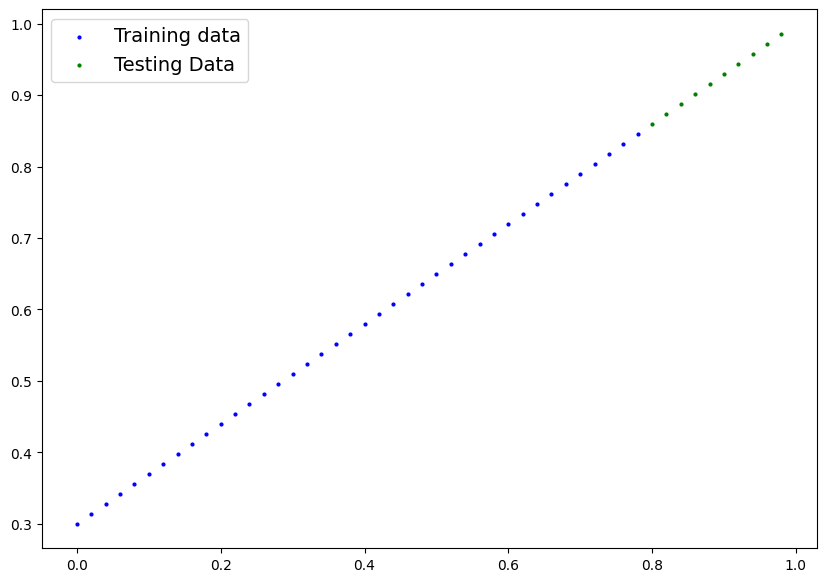

In [ ]:
plot_predictions();

## 2. Build Model

Our first PyTorch Model

This is very exciting Let's learn

What our model does:

* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main alogrithms:

1. Gradient descent
2.Backpropogation

In [ ]:
#Create a linear regression model class

class LinearRegressionModel(nn.Module):#<- almost everything in PyTorch inherits mm.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: #<- "x" is the input data
    return self.weights*x + self.bias #this is the linear regression formula


## PYTorch model building essentials

* torch.nn - contains all of the buildings for computation graphs (a nn can be considetered a computaitional graph)
* torch.nn.parameter - what parameters should our model try and learn, often a pyttoch layers from torch.nn will st this for us
* torch.nn.module - The base class for all nn modules, if you subclass it you should override forward
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
de forward() - all nn.Module subclasses required you to override forward. this method defines what happens in forward computation

### Checking the concept of our Pytorch models

Now we have created a model, let's see what's inside ...

So we can checkout our model parameters or what's inside our model using .parameters()

In [ ]:
# Create a random seed

torch.manual_seed(42)

#Create an instance of the model (this is the subclass of nn.Module)

model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
##List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference()`

To check our model's predicitive power, let's see how well it predicts `y test` based on ` xtest`

When we pass data through our model, it's going to run it through the forward() method.


In [ ]:
#Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

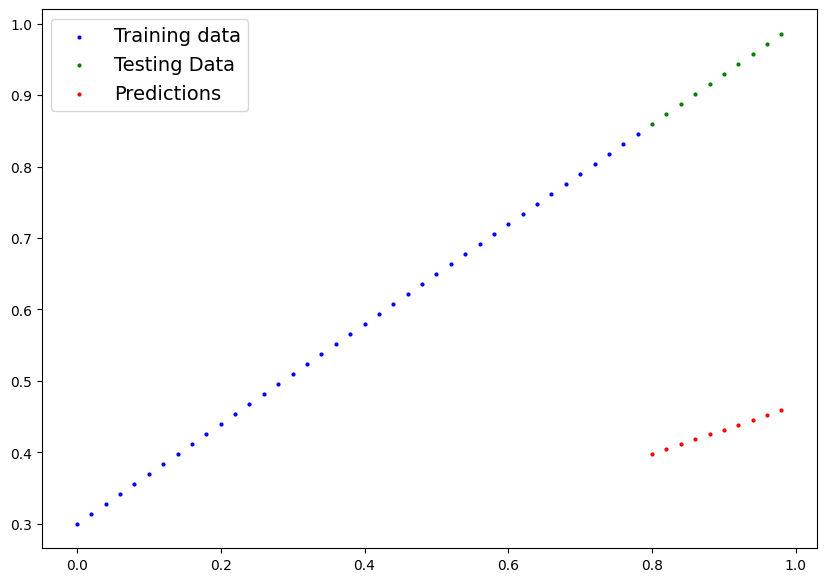

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params  =model_0.parameters(),
                            lr = 0.01) #lr = learning rate = possibly the important learning hyperparameter you can set

In [ ]:
#Build training loop and testing loop

epoch_count = []
loss_values =[]
test_loss_values = []

torch.manual_seed(42)

epochs = 200 #An epoch is one loop through the data... (This is a hyper parameter because we set it ourselves)

###Training
#0. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require grandients

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropogation on the loss with respect to the parameteres of the mode
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

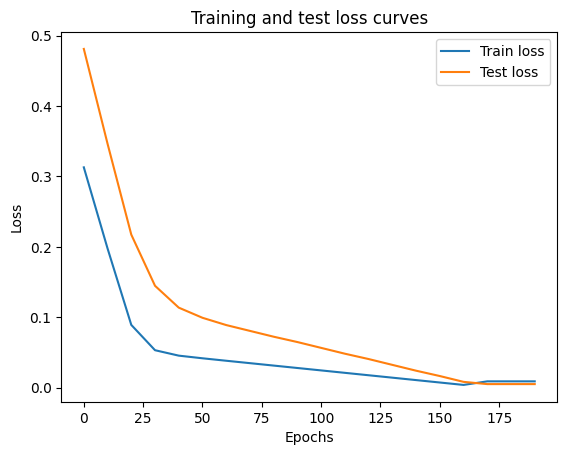

In [ ]:
#plot the loss curve
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

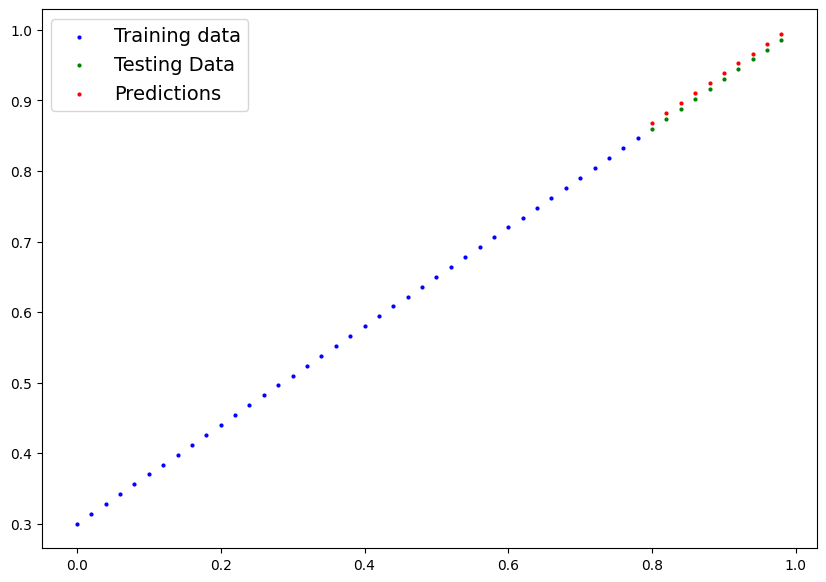

In [ ]:
plot_predictions(predictions = y_preds_new)

In [ ]:
model_0

LinearRegressionModel()

###Saving a model in PyTorch

There are three main methods you should know about for savings and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [ ]:
#Saving our PyTorch model
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)

#2. Create models save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. Save a model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jan  5 16:39 01_pytorch_workflow_model_0.pth


In [ ]:
#loading a PYTORCH MODEL

#Since we only saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#load the saved state_dict of model_0

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#make some prediction
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
#Aggregating the whole code
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

#Check PyTorch version
torch.__version__

#Setup device agnostic code select GPU else CPU

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cuda


In [ ]:
#Data

#Create data using linear regression y =bias + weight * X
weight = 0.7
bias = 0.3

#Create range values
start = 0
end = 1
step = 0.02

#Create X & Y (features and labels)
X= torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

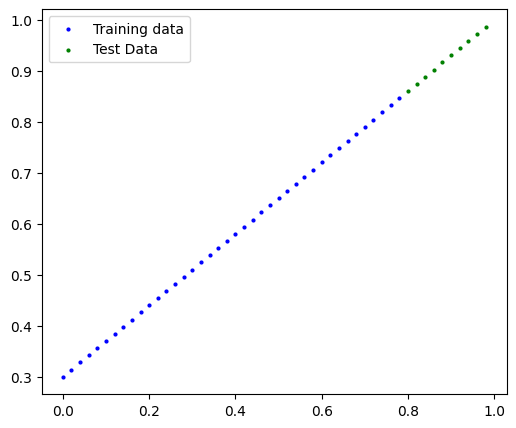

In [ ]:
#plot the data
def plot_regression_prediction(train_data= X_train, train_label= y_train,
                    test_data= X_test, test_label = y_test,
                    predictions = None):
  plt.figure(figsize=(6,5))
  plt.scatter(x=train_data, y=train_label, s=4, c='b',label = "Training data")

  plt.scatter(x=test_data, y=test_label, s=4, c='g', label= "Test Data")

  if predictions is not None:
    plt.scatter(x=test_data, y=predictions, s=4, c='r', label = "Predictions")

  plt.legend(prop={"size":10})

plot_regression_prediction(X_train, y_train, X_test, y_test)

In [ ]:
#Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #self.weights = nn.Parameter(torch.randn(size=1, requires_grad=True, dtype=float))
    #self.bias = nn.Parameter(torch.randn(size=1, requires_grad=True, dtype=float))

    #use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


#set manual seed

torch.manual_seed(42)
model_1= LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#check current device
#next(model_1.parameters()).device

#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
#setup loss function
loss_fn = nn.L1Loss() #same as MAE

#optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(), lr=0.01)

#Training

torch.manual_seed(42)
epochs = 200

#Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward pass
  y_pred = model_1(X_train)

  #2. calculate loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropogation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #Print what's happening

  if epoch % 10 == 0:
    print(f"epoch: {epoch}| Loss: {loss}| Test loss:{test_loss}")


epoch: 0| Loss: 0.5551779866218567| Test loss:0.5739762187004089
epoch: 10| Loss: 0.439968079328537| Test loss:0.4392664134502411
epoch: 20| Loss: 0.3247582018375397| Test loss:0.30455657839775085
epoch: 30| Loss: 0.20954833924770355| Test loss:0.16984669864177704
epoch: 40| Loss: 0.09433845430612564| Test loss:0.03513690456748009
epoch: 50| Loss: 0.023886388167738914| Test loss:0.04784907028079033
epoch: 60| Loss: 0.019956795498728752| Test loss:0.045803118497133255
epoch: 70| Loss: 0.016517987474799156| Test loss:0.037530567497015
epoch: 80| Loss: 0.013089174404740334| Test loss:0.02994490973651409
epoch: 90| Loss: 0.009653178043663502| Test loss:0.02167237363755703
epoch: 100| Loss: 0.006215683650225401| Test loss:0.014086711220443249
epoch: 110| Loss: 0.00278724217787385| Test loss:0.005814164876937866
epoch: 120| Loss: 0.0012645035749301314| Test loss:0.013801801018416882
epoch: 130| Loss: 0.0012645035749301314| Test loss:0.013801801018416882
epoch: 140| Loss: 0.001264503574930131

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#Turn model into evaluations mode
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

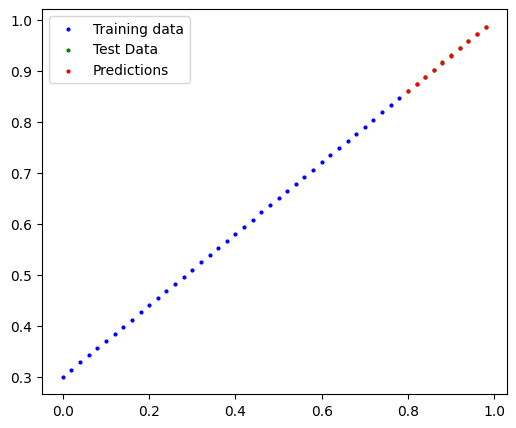

In [ ]:
plot_regression_prediction(predictions = test_pred.cpu())

In [ ]:
from pathlib import Path

#create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save parth

MODEL_NAME= "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Savings model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Savings model to:models/01_pytorch_workflow_model_1.pth


In [ ]:
#Load a PyTorch model

#create a new instance
loaded_model_1 = LinearRegressionModelV2()

#load save model_1 state dict

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

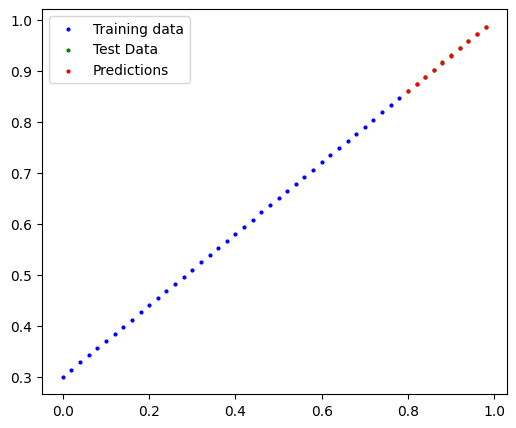

In [ ]:
#Evaluate the loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_y_preds = loaded_model_1(X_test)

y_preds == loaded_y_preds
plot_regression_prediction(predictions = loaded_y_preds.cpu())
